In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import learning_curve


In [276]:
titanic_df_temp= pd.read_csv('data/train.csv')
titanic_df_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [277]:
titanic_df=titanic_df_temp.set_index('PassengerId').copy()
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [278]:
def embarked_transfo(ligne) :
    if ligne['Embarked']=='C' :
        return 1
    elif ligne['Embarked']=='S' :
        return 2
    elif ligne['Embarked']=='Q' :
        return 3
    else :
        return None

def sex_transfo(ligne) :
    if ligne['Sex']=='male' :
        return 1
    elif ligne['Sex']=='female' :
        return 2
    else :
        return None

def age_transfo(ligne) :
    if ligne['Age'] >= 18 :
        return 1
    elif ligne['Age'] < 18 :
        return 0
    else :
        return None

In [279]:
titanic_df_clean=titanic_df.drop(['Name'], axis='columns').copy()

titanic_df_clean['Num_Embarked']=titanic_df_clean.apply(embarked_transfo, axis=1)
titanic_df_clean['Num_sex']=titanic_df_clean.apply(sex_transfo, axis=1)
titanic_df_clean['Label_mineur_majeur']= titanic_df_clean.apply(age_transfo, axis=1)

titanic_df_clean.drop(['Cabin'], axis='columns', inplace=True)
titanic_df_clean.drop(['Ticket'], axis='columns', inplace=True)

titanic_df_clean.dropna(inplace=True)

titanic_df_clean.drop(['Embarked', 'Sex'], axis='columns', inplace=True)
titanic_df_clean.drop(['SibSp', 'Parch'], axis='columns', inplace=True)

titanic_df_clean.reset_index(drop=True, inplace=True)
titanic_df_clean

,Survived,Pclass,Age,Fare,Num_Embarked,Num_sex,Label_mineur_majeur
0,0,3,22.0,7.2500,2.0,1,1.0
1,1,1,38.0,71.2833,1.0,2,1.0
2,1,3,26.0,7.9250,2.0,2,1.0
3,1,1,35.0,53.1000,2.0,2,1.0
4,0,3,35.0,8.0500,2.0,1,1.0
...,...,...,...,...,...,...,...
707,0,3,39.0,29.1250,3.0,2,1.0
708,0,2,27.0,13.0000,2.0,1,1.0
709,1,1,19.0,30.0000,2.0,2,1.0
710,1,1,26.0,30.0000,1.0,1,1.0


In [280]:
# On sépare les features du target :
features, target = titanic_df_clean.loc[:, 'Pclass':'Label_mineur_majeur'], titanic_df_clean["Survived"]

# On split notre dataframe en 2 :
feat_train, feat_test, target_train, target_test = train_test_split(features, target, test_size = 0.4)

# On standardise :  
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)

In [281]:
k_range = list(range(1, 50))

param_grid = dict(n_neighbors=k_range, leaf_size=k_range)


In [282]:
# defining parameter range
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(feat_train, target_train)

Fitting 5 folds for each of 2401 candidates, totalling 12005 fits


In [283]:
kopti =grid_search.best_params_['n_neighbors']
leafopti = grid_search.best_params_['leaf_size']
kopti, leafopti

(1, 1)

In [288]:
grid_search.score(feat_test, target_test)

0.7298245614035088

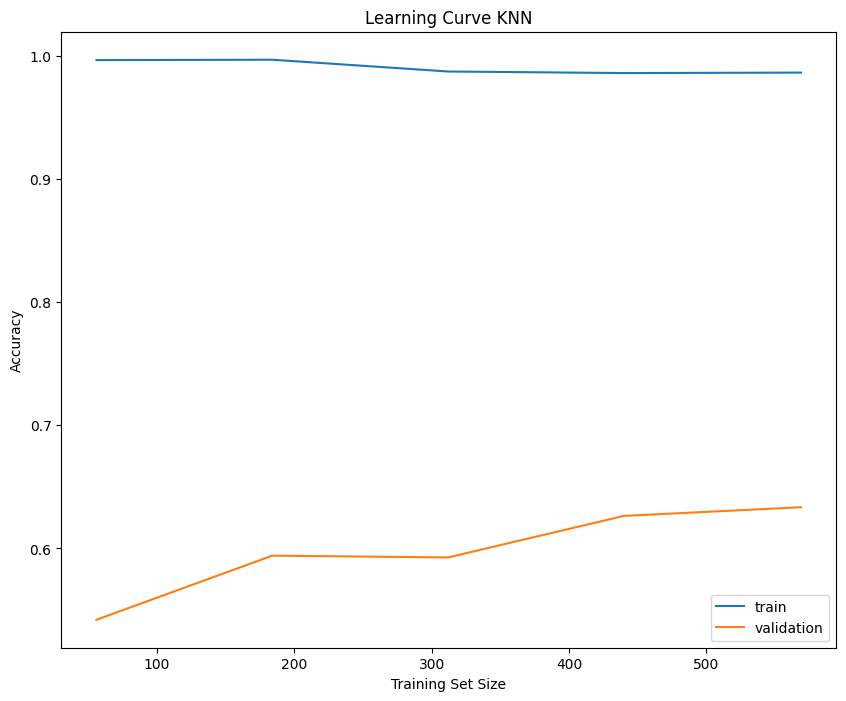

In [285]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsClassifier(n_neighbors=kopti, leaf_size=leafopti),
    X=features,
    y=target,
    cv=5,
    scoring="accuracy"
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve KNN")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")

plt.show()

## Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
titanic_df_pipe=titanic_df.dropna()

# On sépare les features du target :
features2, target2 = titanic_df_pipe.loc[:, ['Pclass','Sex', 'Age', 'Fare', 'Embarked' ]], titanic_df_pipe["Survived"]

# On split notre dataframe en 2 :
feat_train2, feat_test2, target_train2, target_test2 = train_test_split(features2, target2, test_size = 0.4)

In [ ]:
num_data=['Age', 'Fare']
num_transformer = StandardScaler()

cat_data=['Sex', 'Embarked', 'Pclass']
cat_transformer=OneHotEncoder(handle_unknown='ignore')

preprocessor=ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_data),
        ('cat', cat_transformer, cat_data)
    ],
    remainder='passthrough'
)

In [ ]:
# Logistic regression
pipeline_lr=Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())]
)

# Knn
pipeline_knn=Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())]
)

# SVM linear
pipeline_svm=Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', SVC())]
)

#Decision tree
pipeline_decit=Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())]
)

# Random Forest
pipeline_randof=Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())]
)

In [ ]:
pipelines=[pipeline_lr, pipeline_knn, pipeline_svm, pipeline_decit, pipeline_randof]

pip_dict={
            0: 'Logistic Regression', 
            1: 'Nearest Neighbors', 
            2: 'SVM linear', 
            3: 'Decision tree',
            4: 'Random tree'            
        }

In [ ]:
for pipe in pipelines :
    pipe.fit(feat_train2, target_train2)

In [ ]:
for i,model in enumerate(pipelines) :
    #temp=cross_val_score(model, feat_train, target_train, cv=5, scoring='accuracy').mean()
    #print(f'{pip_dict[i]} Cross-validation accuracy {temp}')
    print(f'{pip_dict[i]} Cross-validation accuracy {model.score(feat_test2,target_test2)}')

Logistic Regression Cross-validation accuracy 0.7567567567567568
Nearest Neighbors Cross-validation accuracy 0.6891891891891891
SVM linear Cross-validation accuracy 0.7432432432432432
Decision tree Cross-validation accuracy 0.7027027027027027
Random tree Cross-validation accuracy 0.7702702702702703


In [ ]:
param_range_C = [0.1, 1, 10, 100, 1000]
param_range= [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]

param_grid_lr = [{'classifier__penalty': ['l1', 'l2'],
                   'classifier__C': param_range_C,
                   'classifier__solver': ['liblinear']}]

param_grid_knn = [{'classifier__n_neighbors': [1, 7, 18, 30, 45, 59],
                   'classifier__weights': ['uniform', 'distance'],
                   'classifier__metric': ['euclidean', 'manhattan']}]
                   
param_grid_svm = [{'classifier__kernel': ['linear', 'rbf'], 
                    'classifier__C': param_range_C}]

param_grid_decit = [{'classifier__criterion': ['gini', 'entropy'],
                   'classifier__min_samples_leaf': param_range,
                   'classifier__max_depth': param_range,
                   'classifier__min_samples_split': param_range[1:]}]

param_grid_randof = [{'classifier__min_samples_leaf': param_range,
                   'classifier__max_depth': param_range,
                   'classifier__min_samples_split': param_range[1:]}]


In [ ]:
grid_search_lr = GridSearchCV(estimator=pipeline_lr,
        param_grid=param_grid_lr,
        scoring='accuracy',
        cv=5)
grid_search_knn = GridSearchCV(estimator=pipeline_knn,
        param_grid=param_grid_knn,
        scoring='accuracy',
        cv=5)
grid_search_svm = GridSearchCV(estimator=pipeline_svm,
        param_grid=param_grid_svm,
        scoring='accuracy',
        cv=5)
grid_search_decit = GridSearchCV(estimator=pipeline_decit,
        param_grid=param_grid_decit,
        scoring='accuracy',
        cv=5)
grid_search_randof = GridSearchCV(estimator=pipeline_randof,
        param_grid=param_grid_randof,
        scoring='accuracy',
        cv=5)

In [ ]:
grids = [grid_search_lr, grid_search_knn, grid_search_svm, grid_search_decit, grid_search_randof]
for pipe in grids:
    pipe.fit(feat_train2,target_train2)

In [ ]:
grid_dict = {
                0: 'Logistic Regression', 
                1: 'Nearest Neighbors', 
                2: 'SVM linear', 
                3: 'Decision tree',
                4: 'Random tree'
            }

# for i, model in enumerate(grids):
#     print('{} Test Accuracy: {}'.format(grid_dict[i],
#     model.score(feat_test,target_test)))
#     print('{} Best Params: {}'.format(grid_dict[i],
#     model.best_params_))

best_accuracy=0.0
best_param=''
best_classifier=''

for i,model in enumerate(grids):
    if model.score(feat_test, target_test)>best_accuracy:
        best_accuracy=model.score(feat_test2, target_test2)
        best_param=model.best_params_
        best_classifier=i
print('Classifier with best accuracy:{}'.format(grid_dict[best_classifier]))
print('{} Best Parameters : {}'.format(grid_dict[best_classifier], best_param))
print('{} accuracy : {}'.format(grid_dict[best_classifier], best_accuracy))

Classifier with best accuracy:Logistic Regression
Logistic Regression Best Parameters : {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Logistic Regression accuracy : 0.7567567567567568
